<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Juliman !

Perkenalkan saya Dipta, disini saya akan mereview tugas Juliman ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Juliman dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Tujuan Proyek: 
Menganalisis faktor yang mempengaruhi harga sebuah kendaraan dari data situs web Crankshaft List

## Pra-pemrosesan

In [2]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')



### Memuat Data

In [3]:
# Muat file data menjadi DataFrame
file_url = '/datasets/vehicles_us.csv'
data = pd.read_csv(file_url)

# Menampilkan jumlah baris dan kolom
data.shape


(51525, 13)

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [4]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# tampilkan sampel data
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
# Memeriksa tipe data
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [7]:
# Menampilkan statistik dari data
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
# Mencari kolom yang memiliki nilai hilang
nan_column = []
for col in data.columns:
  if data[col].count() < 51525:
    nan_column.append(col)
print('Kolom yang memiliki nilai hilang : ', nan_column)

Kolom yang memiliki nilai hilang :  ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']


In [9]:
# Menghitung Persentase nilai yang hilang
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Kesimpulan dan Langkah-Langkah Selanjutnya

### Kesimpulan:
1.   Data Memiliki 51525 baris dan 13 kolom sebagai berikut : price,	model_year,	model	condition,	cylinders,	fuel,	odometer,	transmission,	type,	paint_color,	is_4wd,	date_posted, and	days_listed.
2.   Kolom yang memiliki nilai hilang adalah 'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'.
3. Tipe data untuk yang sebaiknya diubah:
 *   model_year , cylinders dan odometer diubah dari float ke integer
 *   is_4wd diubah dari float ke boolean
 *   date_posted dubah dari object ke datetime

4. Ada nilai yang aneh di kolom:

 *   Nilai minimum 1 di kolom price
 *   Nilai minimum 0 di kolom odometer


### Langkah Selanjutnya:
1.   Menganalisa kolom yang hilang lebih lanjut
2.   Memperbaiki tipe data untuk beberapa kolom
3.   Menganalisa nilai yang aneh




<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)



Langkah berikutnya adalah mengisi nilai yang hilang dengan membuat dua fungsi untuk mengisi nilai yang hilang. Fungsi pertama mengisi nilai dengan median dan fungsi kedua mengisi nilai dengan mean. Selain itu fungsi ketiga dibutuhkan untuk memeriksa ada tidaknya outlier untuk menentukan penggunaan fungsi median atau mean untuk mengisi nilai yang hilang.

In [10]:
# Membuat fungsi untuk mengisi nilai yang hilang dengan median
def fill_missing_value_median (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [11]:
# Membuat fungsi untuk mengisi nilai yang hilang dengan mean
def fill_missing_value_mean (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [12]:
# Membuat fungsi untuk menentukan batas atas dan batas bawah dari outlier
def outlier_check(dataframe, col):
  q1 = dataframe[col].quantile(0.25)
  q3 = dataframe[col].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + 1.5*iqr
  lower_bound = q1 - 1.5*iqr
  print('batas atas: {} '.format(upper_bound))
  print('batas bawah: {}'.format(lower_bound))

### Kolom 'model_year'

In [13]:
# Memeriksa nilai yang hilang pada kolom model_year
model_year_nan = data[data['model_year'].isna()]
model_year_nan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


In [14]:
# Menampilkan statistik dari kolom model_year
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [15]:
# Memeriksa batas atas dan bawah untuk menentukan ada tidaknya outlier
outlier_check(data, 'model_year')

batas atas: 2026.0 
batas bawah: 1994.0


In [16]:
# Nilai minimum 1908 sudah melewati batas bawah sehingga lebih baik menggunakan median
# Mengisi nilai yang hilang pada kolom model_year berdasarkan kolom 'model'
fill_missing_value_median (data, 'model', 'model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [17]:
# Memeriksa apakah masih ada nilai yang hilang pada kolom model_year
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Sudah tidak ada lagi nilai yang hilang pada kolom model_year

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Kolom 'cylinders'

In [18]:
# Memeriksa nilai yang hilang pada kolom 'cylinders'
cylinders_nan = data[data['cylinders'].isna()]
cylinders_nan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


In [19]:
# Menampilkan statistik dari kolom 'cylinders'
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [20]:
# Memeriksa batas atas dan bawah untuk menentukan ada tidaknya outlier
outlier_check(data, 'cylinders')

batas atas: 14.0 
batas bawah: -2.0


In [21]:
# Tidak ada outlier di kolom 'cylinders' sehingga untuk mengisi nilai yang hilang dapat menggunakan mean
# Mengisi nilai yang hilang di kolom 'cylinders' berdasarkan kolom 'model'
fill_missing_value_mean (data, 'model', 'cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [22]:
# Memeriksa apakah masih ada nilai yang hilang pada kolom 'cylinders'
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Sudah tidak ada lagi nilai yang hilang pada kolom 'cylinders'

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Kolom 'odometer'

In [23]:
# Memeriksa nilai yang hilang pada kolom 'odometer'
odometer_nan = data[data['odometer'].isna()]
odometer_nan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


In [24]:
# Menampilkan statistik dari kolom 'odometer'
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [25]:
# Memeriksa baris dengan nilai 0 pada kolom 'odometer' (nilai yang aneh)
data.loc[data['odometer']== 0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16
1375,5888,2007.0,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,NaN,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39


Jika dilihat pada kolom model_year yang memiliki nilai tahun bervariasi, tidak mungkin odometer bernilai 0 (kemungkinan error atau tidak diinput), untuk itu kita mengganti nilai 0 dengan NaN, kemudian kita ganti semua nilai NaN tersebut dengan median atau mean

In [26]:
# Mengganti nilai 0 menjadi NaN di kolom 'odometer'
data.loc[data['odometer'] == 0, 'odometer'] = np.nan

In [27]:
# Memeriksa batas atas dan bawah untuk menentukan ada tidaknya outlier
outlier_check(data, 'odometer')

batas atas: 281436.25 
batas bawah: -55637.75


In [28]:
# Nilai max (990000) merupakan outlier karena melewati batas atas (281436.25) sehingga lebih baik menggunakan median untuk mengisi nilai yang hilang
# Mengisi nilai yang hilang pada kolom 'odometer' berdasarkan kolom 'model'
fill_missing_value_median (data, 'model', 'odometer')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121964.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [29]:
# Memeriksa apakah masih ada nilai yang hilang pada kolom 'odometer'
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer         0.079573
price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Ternyata masih ada NaN pada kolom 'odometer' sekitar 0,079%, ini disebabkan adanya nilai unik di kolom 'model' yang semua bernilai NaN dikolom 'odometer' sehingga nilai mediannya tidak ada. Untuk mengisi nilai tersebut kolom 'type' dapat digunakan.

In [30]:
# Mengisi sisa nilai yang hilang di kolom 'odometer' berdasarkan kolom 'type'
# Mengisi nilai yang hilang pada kolom 'odometer' berdasarkan kolom 'model'
fill_missing_value_median (data, 'type', 'odometer')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121964.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [31]:
# Memeriksa apakah masih ada nilai yang hilang pada kolom 'odometer'
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Sudah tidak ada lagi nilai yang hilang pada kolom 'odometer'

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Kolom 'paint_color'

In [32]:
# Memeriksa nilai yang hilang pada kolom 'paint_color'
paint_color_nan = data[data['paint_color'].isna()]
paint_color_nan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,121964.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8


In [33]:
# Nilai yang hilang pada kolom 'paint_color' ada sekitar 17%
data['paint_color'].isna().sum()/ data.shape[0] * 100

17.985443959243085

In [34]:
# Tidak ada data terkait dengan warna mobil, sehingga kita mengisi nilai yang hilang dengan 'unknown'
data['paint_color'] = data['paint_color'].fillna('unknown')

In [35]:
# Memeriksa apakah masih ada nilai yang hilang pada kolom 'paint_color'
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

is_4wd          50.369723
price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Kolom 'is_4wd'

In [36]:
# Memeriksa nilai yang hilang pada kolom 'is_4wd'
is_4wd_nan = data[data['is_4wd'].isna()]
is_4wd_nan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121964.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29


In [37]:
# Memeriksa nilai pada kolom 'is_4wd'
pd.pivot_table(data, index='type', columns='is_4wd', values='price', aggfunc='count')

is_4wd,1.0
type,
SUV,8853
convertible,53
coupe,76
hatchback,160
mini-van,39
offroad,206
other,126
pickup,5026
sedan,563


Tidak ada value selain 1 pada kolom is_4wd di semua baris. Dengan asumpsi semua nilai yang NaN dianggap bukan merupakah 4wd, maka semmua nilai NaN diganti menjadi 0

In [38]:
# Mengisi NaN dengan 0
data.loc[data['is_4wd'].isna(), 'is_4wd'] = 0

In [39]:
# Memeriksa kembali nilai pada kolom 'is_4wd'
pd.pivot_table(data, index='type', columns='is_4wd', values='price', aggfunc='count')

is_4wd,0.0,1.0
type,,
SUV,3552.0,8853.0
bus,24.0,NaN
convertible,393.0,53.0
coupe,2227.0,76.0
hatchback,887.0,160.0
mini-van,1122.0,39.0
offroad,8.0,206.0
other,130.0,126.0
pickup,1962.0,5026.0


In [40]:
# Memeriksa apakah masih ada nilai yang hilang pada kolom 'is_4wd'
data.isna().sum().sort_values(ascending=False) / data.shape[0] * 100

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

Sudah tidak ada lagi nilai yang hilang pada kolom 'is_4wd', demikian juga untuk semua kolom pada dataframe sehingga dapat dilanjutkan ke tahap berikutnya.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memperbaiki Tipe Data

In [41]:
# Memperbaiki tipe data pada kolom 'model_year'
data['model_year'] = data['model_year'].astype('int')

In [42]:
# Memperbaiki tipe data pada kolom 'cylinders'
data['cylinders'] = data['cylinders'].astype('int')

In [43]:
# Memperbaiki tipe data pada kolom 'odometer'
data['odometer'] = data['odometer'].astype('int')

In [44]:
# Memperbaiki tipe data pada kolom 'date_posted'
data['date_posted']= pd.to_datetime(data['date_posted'])

In [45]:
# Kolom is_4wd hanya memiliki dua nilai (boolean) sehingga sebaiknya dirubah dari float ke boolean
data['is_4wd'] = data['is_4wd'].astype('bool')

In [46]:
# Memeriksa kembali seluruh tipe data
data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [47]:
# Menampilkan sample data yang sudah bersih
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,121964,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


Semua tipe data telah disesuaikan

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memperbaiki Kualitas Data

Berikut ini faktor tambahan pada data agar lebih mudah dianalisis:


*   Hari dalam minggu, bulan, dan tahun iklan ditayangkan
*   Usia kendaraan ketika iklan ditayangkan
*   Jarak tempuh rata-rata kendaraan per tahun
*   Mengganti nilai string dengan skala numerik pada kolom 'condition'




In [48]:
# Hari pada saat iklan ditayangkan
data['day_posted'] = data['date_posted'].dt.dayofweek

# Bulan pada saat iklan ditayangkan
data['month_posted'] = data['date_posted'].dt.month

# Tahun pada saat iklan ditayangkan
data['year_posted'] = data['date_posted'].dt.year

In [49]:
# Tambahkan kolom usia kendaraan saat iklan ditayangkan
data['age_car'] = data['year_posted'] - data['model_year']

In [50]:
# Sebelum mencari jarak tempuh rata-rata per tahun, age_car yang bernilai 0 diubah menjadi 1 (dianggap 1 tahun)
# Hal tersebut juga mencegah nilai infinite pada nilai rata-rata
data.loc[data['age_car'] == 0, 'age_car'] = 1

In [51]:
# Tambahkan kolom jarak tempuh rata-rata kendaraan per tahun 
data['avg_distance_year'] = data['odometer'] / data['age_car']

In [52]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def get_condition(cell):
  if cell == 'new':
    return 5
  elif cell == 'like new':
    return 4
  elif cell == 'excellent':
    return 3
  elif cell == 'good':
    return 2
  elif cell == 'fair':
    return 1
  else:
    return 0

In [53]:
# Menjalankan fungsi untuk membuat kolom numerik baru berdasarkan kolom 'condition'
data['condition_numerik'] = data['condition'].apply(get_condition)

In [54]:
# Memeriksa kembali dataframe
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_distance_year,condition_numerik
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,121964,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,7622.750000,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,3


In [55]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age_car,avg_distance_year,condition_numerik
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.075381,115790.705735,39.55476,3.005434,6.628491,2018.307462,8.555672,19001.175380,2.637535
std,10040.803015,6.099381,1.639871,60230.503885,28.20427,1.997759,3.474134,0.461447,6.057829,16474.483372,0.712447
min,1.000000,1908.000000,3.000000,1.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.034483,0.000000
25%,5000.000000,2007.000000,4.000000,77998.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,10527.133333,2.000000
50%,9000.000000,2011.000000,6.000000,116000.000000,33.00000,3.000000,7.000000,2018.000000,8.000000,15074.250000,3.000000
75%,16839.000000,2014.000000,8.000000,148177.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,21912.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memeriksa Data yang Sudah Bersih

Berikutnya data yang sudah bersih diperiksa kembali

In [56]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int64         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  day_posted         51525 non-null  int64         
 14  month_

In [57]:
# tampilkan sampel data 
data.sample(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_distance_year,condition_numerik
48337,10900,2010,ram 1500,good,6,gas,85680,automatic,pickup,grey,False,2018-07-31,16,1,7,2018,8,10710.000000,2
40973,22975,2014,ford f250,excellent,8,gas,101844,automatic,pickup,white,True,2019-03-05,51,1,3,2019,5,20368.800000,3
14442,10995,2013,ram 3500,good,6,diesel,359588,automatic,truck,unknown,False,2019-02-08,71,4,2,2019,6,59931.333333,2
24341,8995,2008,gmc acadia,like new,6,gas,148093,automatic,SUV,white,False,2019-02-19,77,1,2,2019,11,13463.000000,4
46673,11988,2007,ford ranger,like new,6,gas,141500,automatic,truck,white,True,2019-04-17,60,2,4,2019,12,11791.666667,4


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari Parameter Inti 
Berikut ini parameter yang akan dianalisa:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

In [58]:
# Menampilkan korelasi antara parameter inti
data[['price', 'age_car', 'odometer', 'cylinders','condition_numerik']].corr()[:1]

,price,age_car,odometer,cylinders,condition_numerik
price,1.0,-0.406648,-0.390281,0.299711,0.221518




*   Ada korelasi negatif antara harga dan odometer(jarak yang telah ditempuh), yang berarti harga semakin rendah jika nilai odometer semakin tinggi. Korelasi negatif yang lebih kuat bisa dilihat pada usia mobil pada kolom age_car. Namun kedua korelasi ini tidak begitu signifikan
*   Ada korelasi positif antara harga dan jumlah silinder yang juga tidak begitu signifikan, begitu juga dengan korelasi antara harga dan kondisi



/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


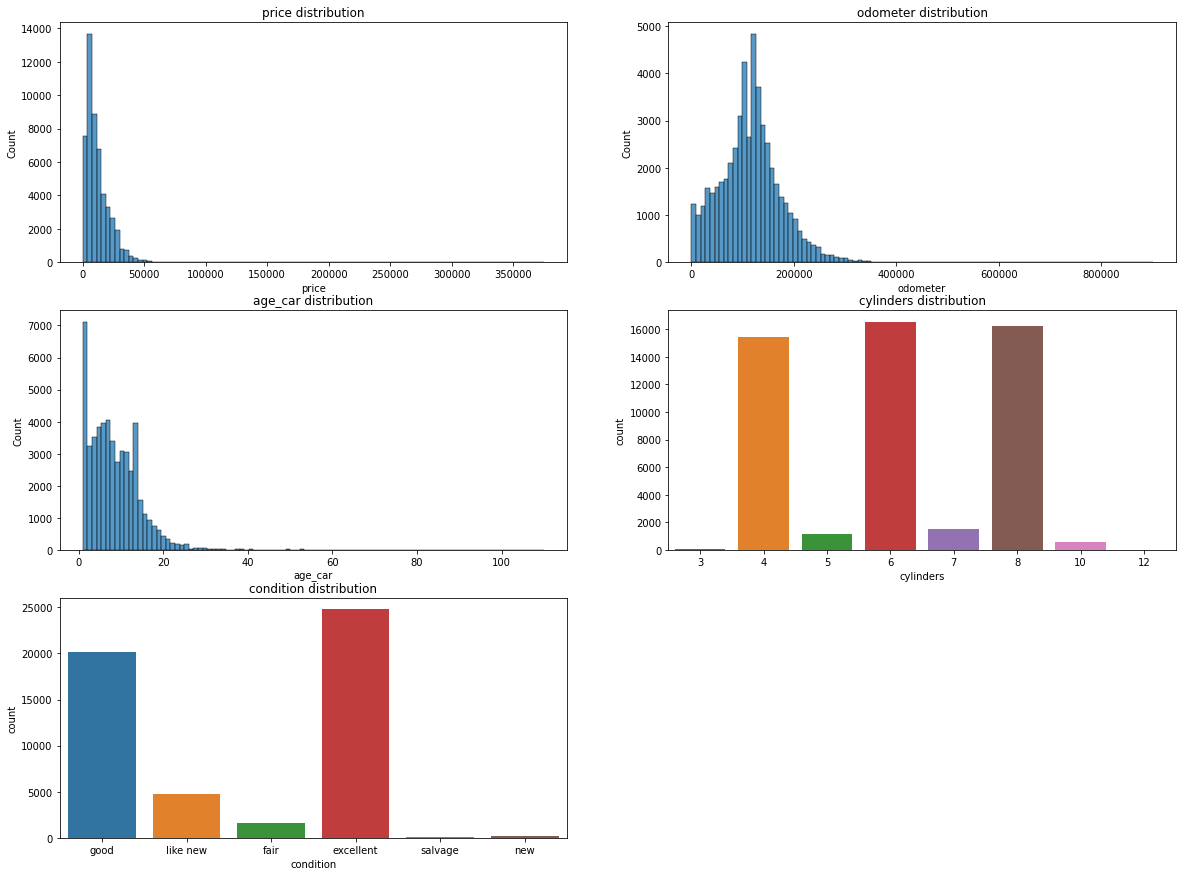

In [59]:
# Menampilkan histogram untuk parameter inti
plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
plt.title('price distribution')
sns.histplot(data['price'], bins=100)

plt.subplot(3,2,2)
plt.title('odometer distribution')
sns.histplot(data['odometer'], bins=100, binrange=[0, 900000])

plt.subplot(3,2,3)
plt.title('age_car distribution')
sns.histplot(data['age_car'], bins=100)

plt.subplot(3, 2, 4)
plt.title('cylinders distribution')
sns.countplot(data['cylinders'])

plt.subplot(3, 2, 5)
plt.title('condition distribution')
sns.countplot(data['condition'])

plt.show()


### Harga

In [60]:
# Harga
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

* Distribusi harga condong ke kanan
* Terlihat distribusi paling banyak di rentang harga relatif rendah. 
* Ada nilai 1 dolar yang kemungkinan disebabkan salah input
* Dari gambar terlihat outlier yang signifikan

### Usia kendaraan ketika iklan ditayangkan

In [61]:
# Usia kendaraan ketika iklan ditayangkan
data['age_car'].describe()


count    51525.000000
mean         8.555672
std          6.057829
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_car, dtype: float64

*  Terlihat distribusi paling banyak di rentang usia 1 sampai 20 tahun.
*  Outlier terlihat jelas dengan nilai maksimum 110

### Jarak Tempuh

In [62]:
# Jarak tempuh
data['odometer'].describe()

count     51525.000000
mean     115790.705735
std       60230.503885
min           1.000000
25%       77998.000000
50%      116000.000000
75%      148177.000000
max      990000.000000
Name: odometer, dtype: float64

*  Distribusi odometer condong ke kanan
*  Terlihat distribusi paling banyak di rentang jarak 0 sampai 200000 dengan puncak di sekitar 120000
*  Distribusi yang sangat luas dari 1 sampai 990000 menunjukan banyaknya outlier

### Jumlah silinder

In [63]:
# Jumlah silinder
data['cylinders'].describe()


count    51525.000000
mean         6.075381
std          1.639871
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

*   Dari histogram, kebanyakan kendaraan memiliki 4, 6 dan 8 silinder
*   Terlihat distribusi paling banyak di rentang usia 1 sampai 20 tahun.
*   Selisih nilai mean dan median sangat sedikit, sehingga dapat disimpulkan kolom ini tidak memiliki outlier

### Kondisi

In [64]:
# Kondisi
data['condition_numerik'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_numerik, dtype: float64

*   Dari histogram, kebanyakan kendaraan memiliki kondisi 'good' dan 'excellent'.
*   Ada sedikit selisih antara mean (2.63) dan median (3), sehingga dapat disimpulkan tidak banyak outlier di kolom ini.



<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari dan Menangani Outlier

### Harga

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

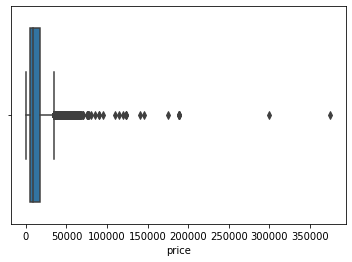

In [65]:
# Menampilkan boxplot untuk melihat outlier
sns.boxplot(data['price'])


In [66]:
# Menentukan batas bawah dan batas atas outlier 

q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
upper_bound_price = q3 + 1.5*iqr
lower_bound_price = q1 - 1.5*iqr

print('batas atas harga: {} '.format(upper_bound_price))
print('batas bawah harga: {}'.format(lower_bound_price))


batas atas harga: 34597.5 
batas bawah harga: -12758.5


In [67]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
new_data = data[(data['price']>lower_bound_price) & (data['price']<upper_bound_price)].reset_index(drop=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

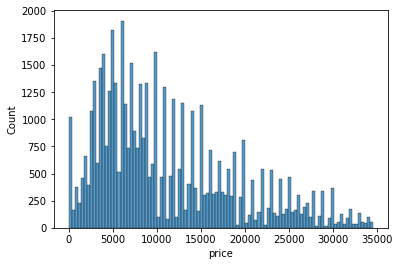

In [68]:
# Menampilkan histogram tanpa outlier
sns.histplot(new_data['price'], bins=100)

In [69]:
# Menganalisa harga yang mendekati 0
# Mencari harga dibawah 1000
new_data.query('price < 1000')['price'].value_counts()

1      798
500     79
800     53
700     35
69      34
      ... 
460      1
472      1
169      1
483      1
32       1
Name: price, Length: 116, dtype: int64

* Dari temuan di kesimpulan awal, terdapat nilai aneh untuk kolom harga yaitu 0.
* Selain 0 harga dibawah 1000 termasuk sangat rendah dan tidak masuk akal untuk sebuah mobil bekas, kemungkinan penjual sengaja tidak mencantumkan harga sebenarnya agar negosiasi harga dilakukan via telpon atau chat.

* Jumlah data dengan harga dibawah 1000 ada 116 baris

* Untuk keperluan analisis harga dibawah 1000 tidak representatif, sehingga lebih baik dihapus

In [70]:
# Menghapus baris dengan harga dibawah 100 pada dataframe baru
new_data = new_data.query('price >= 1000')

* Outlier pada dataframe telah dibuang
* Harga dibawah 1000 dihapus dari dataframe baru



<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Usia kendaraan ketika iklan ditayangkan

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_car'>

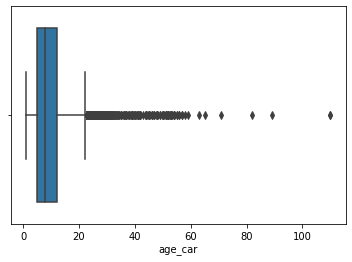

In [71]:
# Menampilkan boxplot untuk melihat outlier
sns.boxplot(new_data['age_car'])

In [72]:
# Menentukan batas bawah dan batas atas outlier 

q1 = new_data['age_car'].quantile(0.25)
q3 = new_data['age_car'].quantile(0.75)
iqr = q3 - q1
upper_bound_age = q3 + 1.5*iqr
lower_bound_age = q1 - 1.5*iqr

print('batas atas usia kendaraan: {} '.format(upper_bound_age))
print('batas bawah usia kendaraan: {}'.format(lower_bound_age))

batas atas usia kendaraan: 22.5 
batas bawah usia kendaraan: -5.5


In [73]:
# Simpan data tanpa outlier pada dataframe baru
new_data = new_data[(new_data['age_car']>lower_bound_age) & (new_data['age_car']<upper_bound_age)].reset_index(drop=True)

Data baru telah diubah dengan mengeluarkan outlier pada kolom 'age_car'

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Jarak tempuh


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

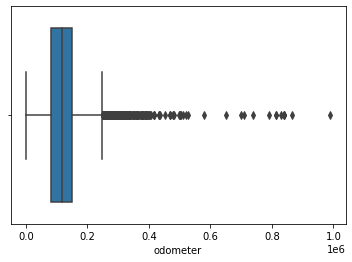

In [74]:
# Menampilkan boxplot untuk melihat outlier
sns.boxplot(new_data['odometer'])

In [75]:
# Menentukan batas bawah dan batas atas outlier 

q1 = new_data['odometer'].quantile(0.25)
q3 = new_data['odometer'].quantile(0.75)
iqr = q3 - q1
upper_bound_odometer = q3 + 1.5*iqr
lower_bound_odometer = q1 - 1.5*iqr

print('batas atas jarak tempuh: {} '.format(upper_bound_odometer))
print('batas bawah jarak tempuh: {}'.format(lower_bound_odometer))

batas atas jarak tempuh: 249177.5 
batas bawah jarak tempuh: -16706.5


In [76]:
# Simpan data tanpa outlier pada dataframe baru
new_data = new_data[(new_data['odometer']>lower_bound_odometer) & (new_data['odometer']<upper_bound_odometer)].reset_index(drop=True)

Data baru telah diubah dengan mengeluarkan outlier pada kolom 'odometer'

### Jumlah silinder


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders'>

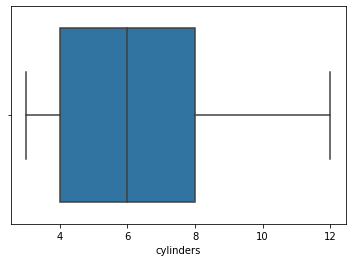

In [78]:
# Menampilkan boxplot untuk melihat outlier
sns.boxplot(new_data['cylinders'])

In [79]:
# Menentukan batas bawah dan batas atas outlier 

q1 = new_data['cylinders'].quantile(0.25)
q3 = new_data['cylinders'].quantile(0.75)
iqr = q3 - q1
upper_bound_cylinders = q3 + 1.5*iqr
lower_bound_cylinders = q1 - 1.5*iqr

print('batas atas silinder: {} '.format(upper_bound_cylinders))
print('batas bawah silinder: {}'.format(lower_bound_cylinders))

batas atas silinder: 14.0 
batas bawah silinder: -2.0


* Seperti kesimpulan pada tahap sebelumnya tidak ada outlier pada kolom 'cylinders'.
* Jumlah silinder ada pada nilai 1 sampai 12 yang masih didalam batas bawah dan batas atas (-2 sampai 14)
* Dengan demikian dataframe baru tidak perlu diubah untuk kolom 'cylinders'

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Kondisi

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition_numerik'>

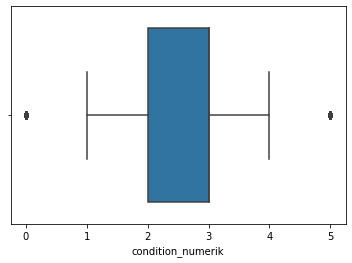

In [80]:
# Menampilkan boxplot untuk melihat outlier
sns.boxplot(data['condition_numerik'])

In [81]:
# Menentukan batas bawah dan batas atas outlier 

q1 = data['condition_numerik'].quantile(0.25)
q3 = data['condition_numerik'].quantile(0.75)
iqr = q3 - q1
upper_bound_condition = q3 + 1.5*iqr
lower_bound_condition = q1 - 1.5*iqr

print('batas atas kondisi: {} '.format(upper_bound_condition))
print('batas bawah kondisi: {}'.format(lower_bound_condition))

batas atas kondisi: 4.5 
batas bawah kondisi: 0.5


In [82]:
# Simpan data tanpa outlier pada dataframe baru
new_data = new_data[(new_data['condition_numerik']>lower_bound_condition) & (new_data['condition_numerik']<upper_bound_condition)].reset_index(drop=True)

Ada sedikit outlier untuk kolom ini yakni untuk kondisi 5 (new), untuk itu kita perlu menghilangkan outlier ini di dataframe baru

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari Parameter Inti Tanpa Outlier

Bagian ini menampilkan data asli dengan data yang telah difilter untuk parameter harga, usia kendaraan ketika iklan ditayangkan, jarak tempuh, jumlah silinder dan kondisi.

In [83]:
# Menghitung selisih antara jumlah row antara dataframe asli dan dataframe baru
data_len = len(data)
new_data_len = len(new_data)
diff_row = data_len - new_data_len
print('Jumlah baris dataframe asli : {}'.format(data_len))
print('Jumlah baris dataframe baru : {}'.format(new_data_len))
print('Selisih baris : {}'.format(diff_row))

Jumlah baris dataframe asli : 51525
Jumlah baris dataframe baru : 46327
Selisih baris : 5198


Jumlah baris yang hilang pada dataframe baru adalah 4933

In [84]:
# Menghitung korelasi pada dataframe baru tanpa outlier
new_data[['price', 'age_car', 'odometer', 'cylinders','condition_numerik']].corr()[:1]

,price,age_car,odometer,cylinders,condition_numerik
price,1.0,-0.558126,-0.460322,0.352094,0.193693


In [85]:
# Dataframe asli
data[['price', 'age_car', 'odometer', 'cylinders','condition_numerik']].corr()[:1]

,price,age_car,odometer,cylinders,condition_numerik
price,1.0,-0.406648,-0.390281,0.299711,0.221518


* Pada dataframe baru, dapat dilihat korelasi negatif lebih kuat antara harga dan usia kendaraan dibanding pada dataframe asli. Namun sedikit lebih lemah untuk jarak tempuh (odometer).
* Korelasi positif semakin kuat antara harga dan jumlah silinder dibanding dataframe asli, begitu juga korelasi antara harga dan kondisi

### Harga

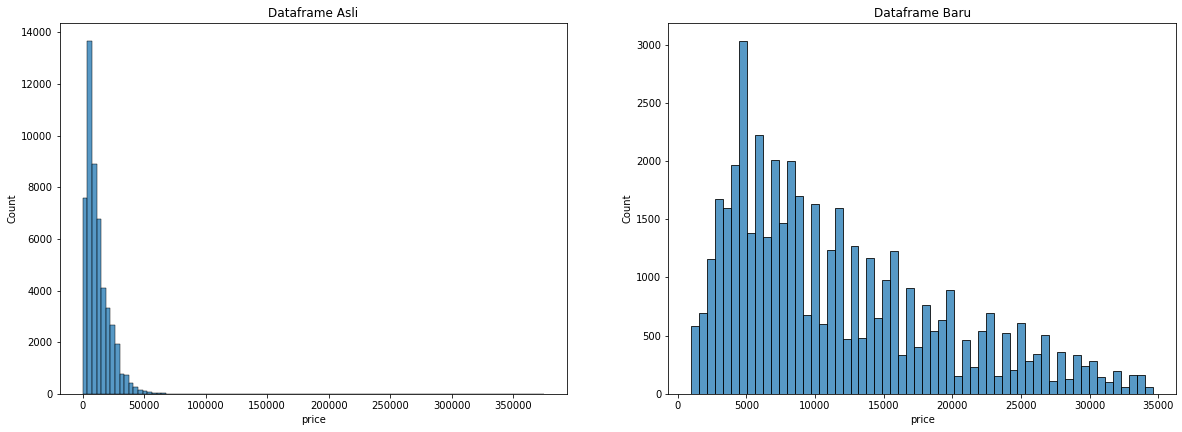

In [86]:
# Menampilkan perbandingan histogram harga pada dataframe asli dan baru
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.histplot(data['price'], bins=100)

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.histplot(new_data['price'])

plt.show()

* Pada dataframe baru frekuensi puncak tidak ekstrem seperti dataframe asli
*   Pada dataframe baru terlihat harga yang terlalu kecil dan bernilai 0 sudah tidak ada.
*   Pada dataframe baru terlihat lebih jelas bahwa frekuensi munculnya puncak harga memberikan pola yang menggambarkan penjual menggunakan harga yang telah dibulatkan.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


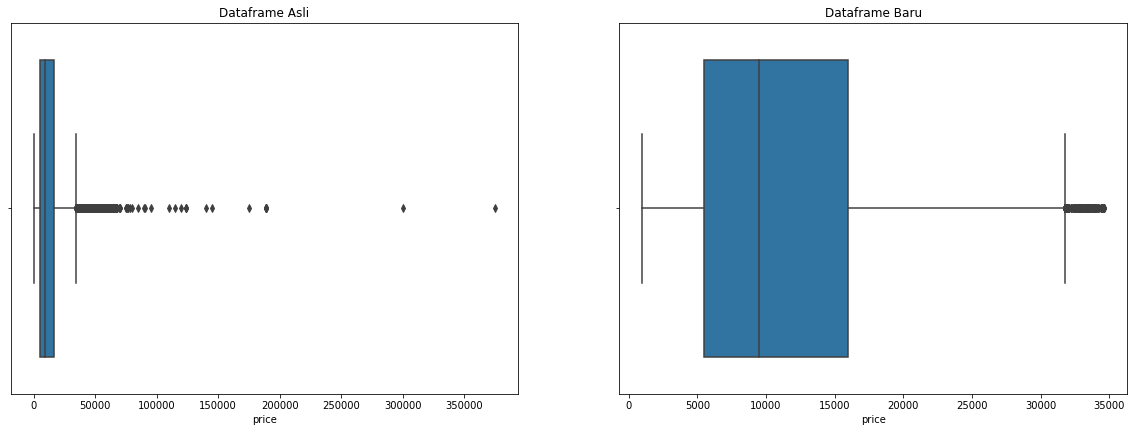

In [87]:
# Boxplot Chart
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.boxplot(data['price'])

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.boxplot(new_data['price'])

plt.show()

Pada dataframe baru outlier berkurang secara drastis, sehingga data lebih representatif untuk analisis.

In [88]:
# Nilai mean dan median pada dataframe asli
print(data['price'].describe()[1:2])
print("")
print(data['price'].describe()[5:6])

mean    12132.46492
Name: price, dtype: float64

50%    9000.0
Name: price, dtype: float64


In [89]:
# Nilai mean dan median pada dataframe baru
print(new_data['price'].describe()[1:2])
print("")
print(new_data['price'].describe()[5:6])

mean    11619.692318
Name: price, dtype: float64

50%    9499.0
Name: price, dtype: float64


Selisih nilai mean dan median pada dataframe baru lebih kecil dibandingkan dataframe lama.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Usia kendaraan ketika iklan ditanyangkan

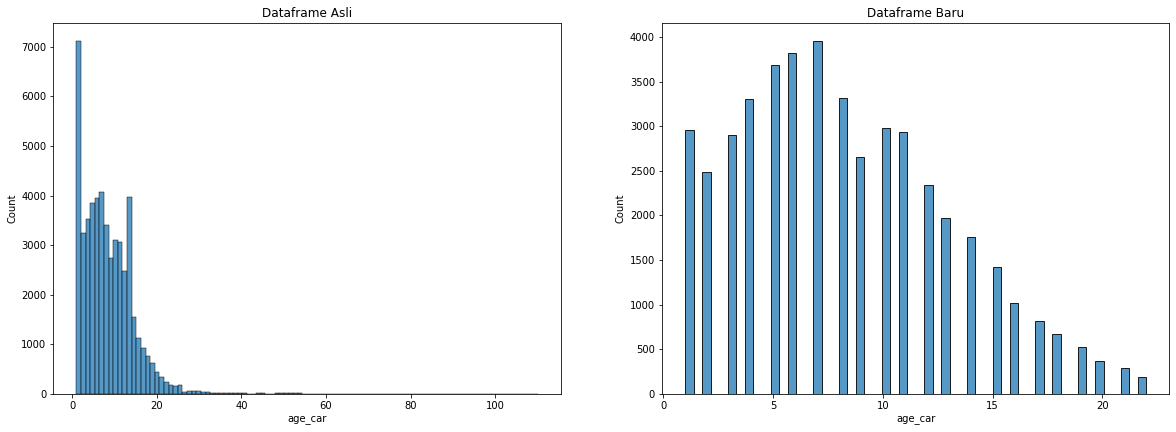

In [90]:
# Menampilkan perbandingan histogram harga pada dataframe asli dan baru
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.histplot(data['age_car'], bins=100)

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.histplot(new_data['age_car'])

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


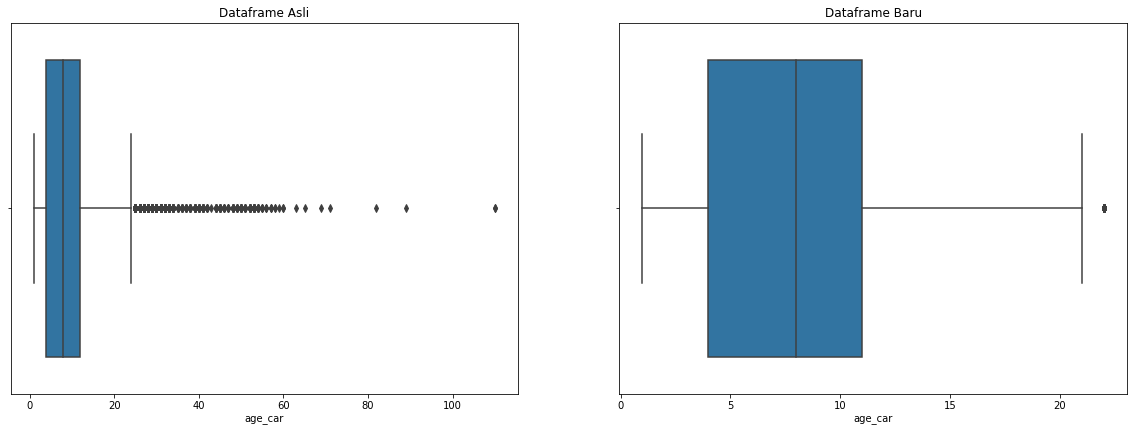

In [91]:
# Boxplot Chart
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.boxplot(data['age_car'])

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.boxplot(new_data['age_car'])

plt.show()

Pada dataframe baru outlier berkurang secara drastis, sehingga data lebih representatif untuk analisis.

In [92]:
# Nilai mean dan median pada dataframe asli
print(data['age_car'].describe()[1:2])
print("")
print(data['age_car'].describe()[5:6])

mean    8.555672
Name: age_car, dtype: float64

50%    8.0
Name: age_car, dtype: float64


In [93]:
# Nilai mean dan median pada dataframe baru
print(new_data['age_car'].describe()[1:2])
print("")
print(new_data['age_car'].describe()[5:6])

mean    8.212641
Name: age_car, dtype: float64

50%    8.0
Name: age_car, dtype: float64


Selisih nilai mean dan median pada dataframe baru lebih kecil dibandingkan dataframe lama.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Jarak tempuh

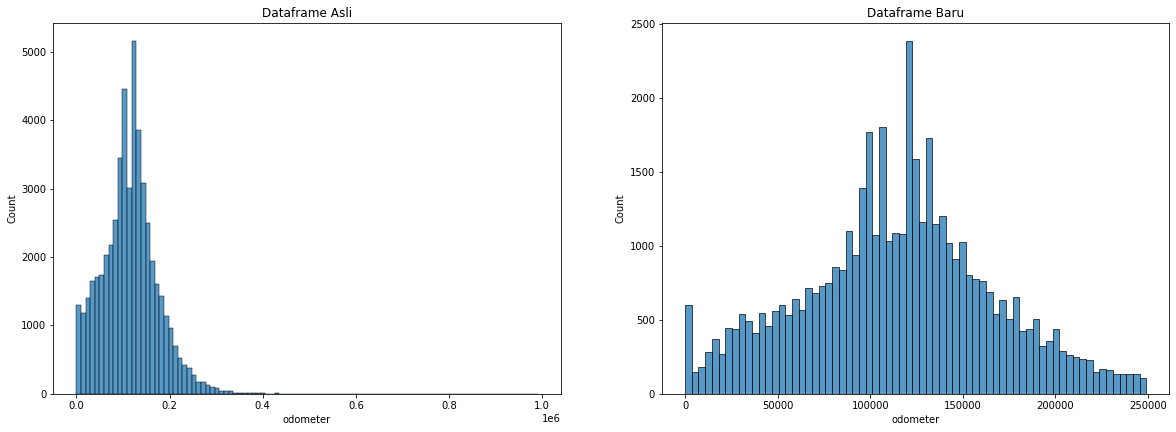

In [94]:
# Menampilkan perbandingan histogram harga pada dataframe asli dan baru
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.histplot(data['odometer'], bins=100)

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.histplot(new_data['odometer'])

plt.show()

Histogram dari dataframe baru pada kolom 'odometer' (jarak tempuh) mendekati distribusi normal

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


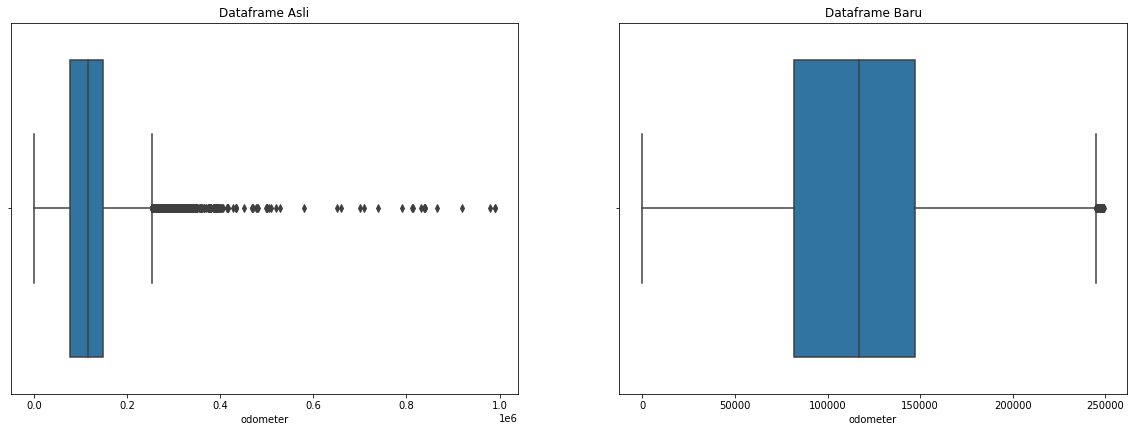

In [95]:
# Boxplot Chart
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.boxplot(data['odometer'])

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.boxplot(new_data['odometer'])

plt.show()

Outlier pada dataframe baru dikolom odometer telah berkurang drastis

In [96]:
# Nilai mean dan median pada dataframe asli
print(data['odometer'].describe()[1:2])
print("")
print(data['odometer'].describe()[5:6])

mean    115790.705735
Name: odometer, dtype: float64

50%    116000.0
Name: odometer, dtype: float64


In [97]:
# Nilai mean dan median pada dataframe baru
print(new_data['odometer'].describe()[1:2])
print("")
print(new_data['odometer'].describe()[5:6])

mean    114608.738489
Name: odometer, dtype: float64

50%    117000.0
Name: odometer, dtype: float64


Selisih mean dan median untuk jarak tempuh lebih kecil pada dataframe baru dibandingkan pada dataframe lama

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Jumlah silinder

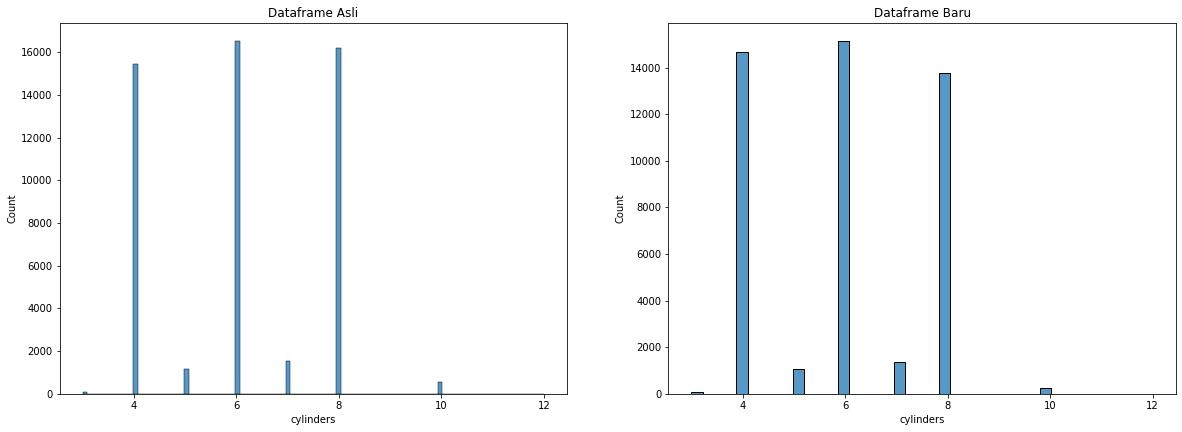

In [98]:
# Menampilkan perbandingan histogram harga pada dataframe asli dan baru
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.histplot(data['cylinders'], bins=100)

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.histplot(new_data['cylinders'])

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


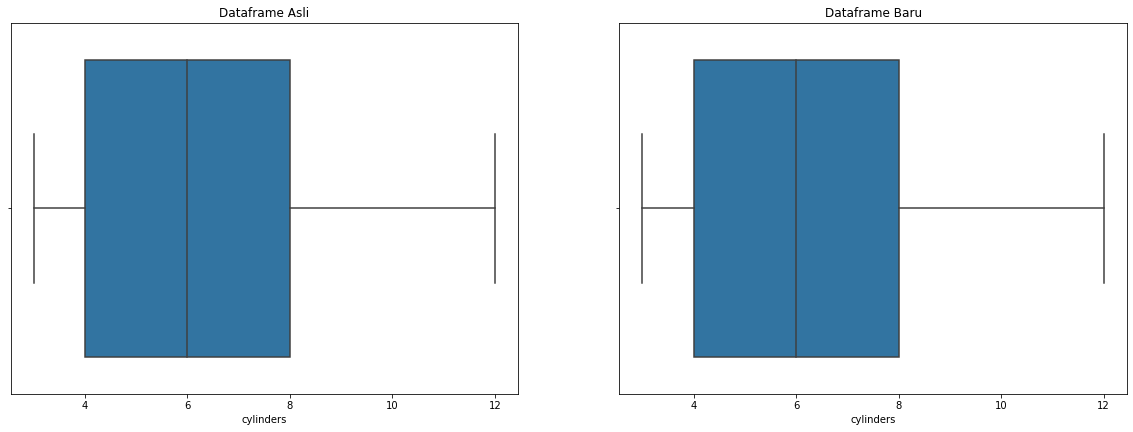

In [99]:
# Boxplot Chart
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.boxplot(data['cylinders'])

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.boxplot(new_data['cylinders'])

plt.show()

In [100]:
# Nilai mean dan median pada dataframe asli
print(data['cylinders'].describe()[1:2])
print("")
print(data['cylinders'].describe()[5:6])

mean    6.075381
Name: cylinders, dtype: float64

50%    6.0
Name: cylinders, dtype: float64


In [101]:
# Nilai mean dan median pada dataframe baru
print(new_data['cylinders'].describe()[1:2])
print("")
print(new_data['cylinders'].describe()[5:6])

mean    5.98502
Name: cylinders, dtype: float64

50%    6.0
Name: cylinders, dtype: float64


* Seperti yang diketahui pada tahapan sebelumnya tidak banyak perubahan pada parameter silinder karena tidak ada outlier yang dihapus dari dataframe lama berdasarkan parameter ini.
* Ada sedikit perubahan frekuensi pada histogram dan mean karena ada baris-baris yang dihilangkan dengan pertimbangan dari parameter-parameter yang lain. Namun pola histogram terlihat sama antara dataframe asli dan dataframe baru untuk parameter ini.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Kondisi

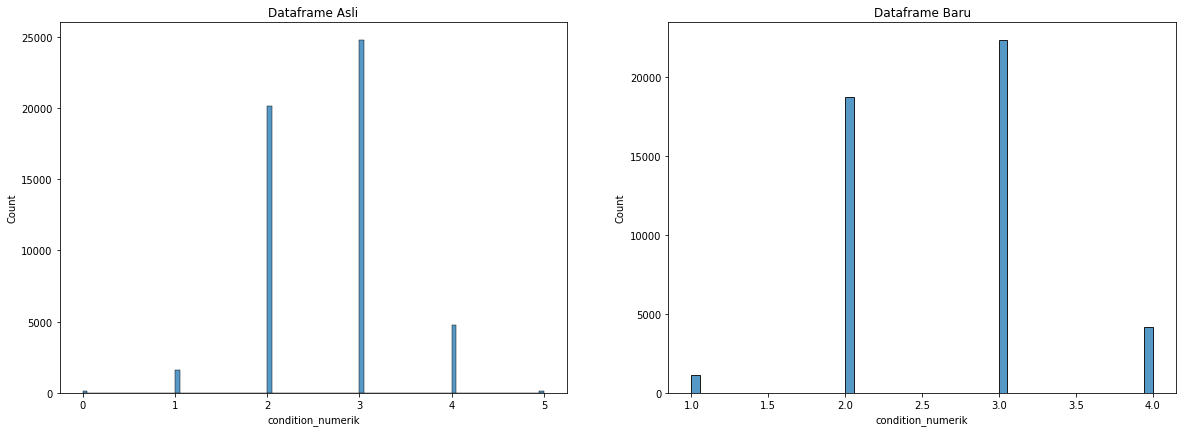

In [102]:
# Menampilkan perbandingan histogram harga pada dataframe asli dan baru
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.histplot(data['condition_numerik'], bins=100)

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.histplot(new_data['condition_numerik'])

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


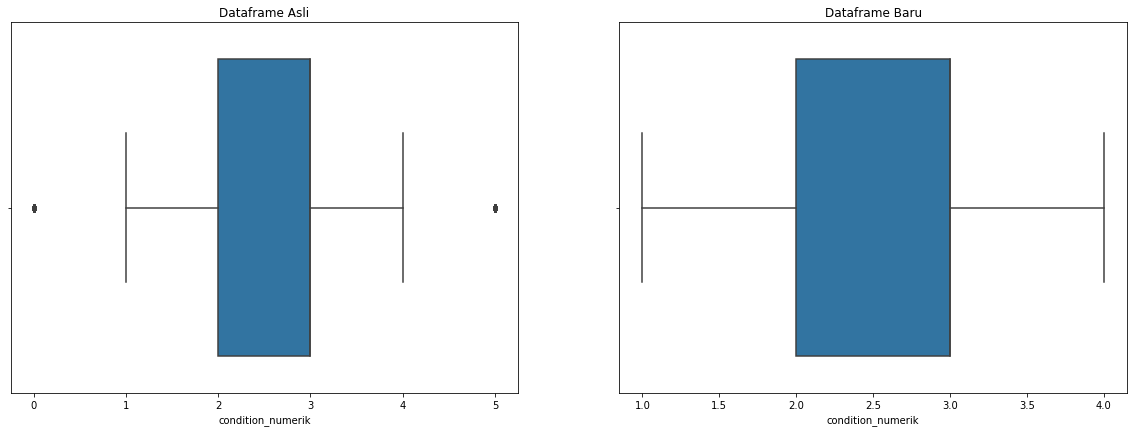

In [103]:
# Boxplot Chart
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.title('Dataframe Asli')
sns.boxplot(data['condition_numerik'])

plt.subplot(2,2,2)
plt.title('Dataframe Baru')
sns.boxplot(new_data['condition_numerik'])

plt.show()

In [104]:
# Nilai mean dan median pada dataframe asli
print(data['condition_numerik'].describe()[1:2])
print("")
print(data['condition_numerik'].describe()[5:6])

mean    2.637535
Name: condition_numerik, dtype: float64

50%    3.0
Name: condition_numerik, dtype: float64


In [105]:
# Nilai mean dan median pada dataframe baru
print(new_data['condition_numerik'].describe()[1:2])
print("")
print(new_data['condition_numerik'].describe()[5:6])

mean    2.637317
Name: condition_numerik, dtype: float64

50%    3.0
Name: condition_numerik, dtype: float64


* Secara umum hampir tidak ada perubahan pola pada histogram, boxplot, dan mean karena outlier pada dataframe asli hanya sedikit.
* Semua outlier tidak terlihat pada boxplot dataframe baru.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Masa Berlaku Iklan 
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

In [106]:
# Menghitung statistik dari jumlah hari iklan ditayangkan pada kolom 'days_listed'
new_data['days_listed'].describe()

count    46327.000000
mean        39.573488
std         28.244668
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

* Untuk masa berlaku iklan nilai mean 39,57 dan meidan 33.0
* Jumlah hari iklan ditayangkan dari 0 sampai 271 hari

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_listed'>

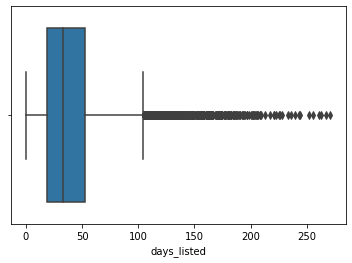

In [107]:
# Menampilkan boxplot untuk hari iklan ditayangkan
sns.boxplot(new_data['days_listed'])

Dari boxplot dapat dilihat banyak outlier untuk jumlah hari iklan ditayangkan

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

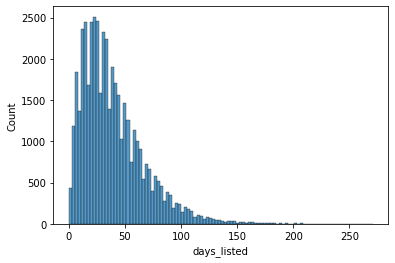

In [108]:
# Histogram untuk berapa hari iklan ditayangkan
sns.histplot(new_data['days_listed'], bins = 100)

Dari histogram terlihat frekuensi terbanyak ada di kisaran 0 sampai 50 hari penayangan iklan. Kemungkinan mobil banyak terjual di 50 hari pertama.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Harga Rata-Rata Setiap Jenis Kendaraan

Bagian ini akan menganalisis jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. 

In [109]:
# Menampilkan tabel jumlah iklan dan harga rata-rata pada setiap jenis kendaraan
agg_group_1 = new_data.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by='count_type', ascending=False)

agg_group_1

,avg_price,count_type
type,,
sedan,7229.065225,11468
SUV,10844.147768,11403
truck,15733.850066,10598
pickup,15337.547300,6110
coupe,14272.943356,1889
wagon,9157.017747,1465
mini-van,8143.660444,1125
hatchback,7048.475698,967
van,9259.030741,553


Jumlah iklan terbanyak ada pertama adalah tipe **sedan** dan yang kedua adalah tipe **SUV**

Text(0, 0.5, 'average price per type')

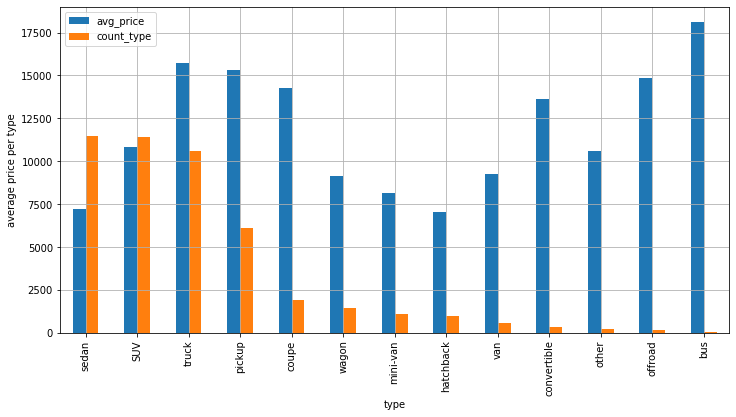

In [110]:
# Menampilkan grafik jumlah iklan dan harga rata-rata pada setiap jenis kendaraan
agg_group_1.plot(kind='bar', grid=True, figsize=(12,6))
plt.ylabel('average price per type')

* Dari tabel terlihat iklan yang terbanyak ada di jenis sedan, SUV, truck dan pickup.
* Harga sedan dan SUV relatif rendah dibanding jenis kendaraan lain, yang mungkin menyebabkan dua jenis kendaraan ini laris manis.
* Dengan demikian dapat disimpulkan dua kendaraan populer adalah **sedan** dan SUV

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Faktor Harga

* Bagian ini menganalisa faktor yang paling mempengaruhi harga berdasarkan dua jenis kendaraan yang populer yaitu **sedan** dan **SUV**.

* Harga kedua jenis kendaraan ini akan dianalisis berdasarkan parameter usia, jarak tempuh, kondisi, tipe transmisi dan warnanya.

### Sedan

**Numerik**

Menganalisa kolom numerik

In [111]:
# Membuat dataframe sedan
sedan = new_data[new_data['type']=='sedan'].reset_index(drop=True)

In [112]:
# Korelasi antara harga dan parameter lain
sedan.corr()['price']

price                1.000000
model_year           0.688375
cylinders            0.010717
odometer            -0.572597
is_4wd               0.115421
days_listed          0.003926
day_posted          -0.003060
month_posted        -0.018067
year_posted          0.015169
age_car             -0.678504
avg_distance_year    0.366195
condition_numerik    0.310160
Name: price, dtype: float64

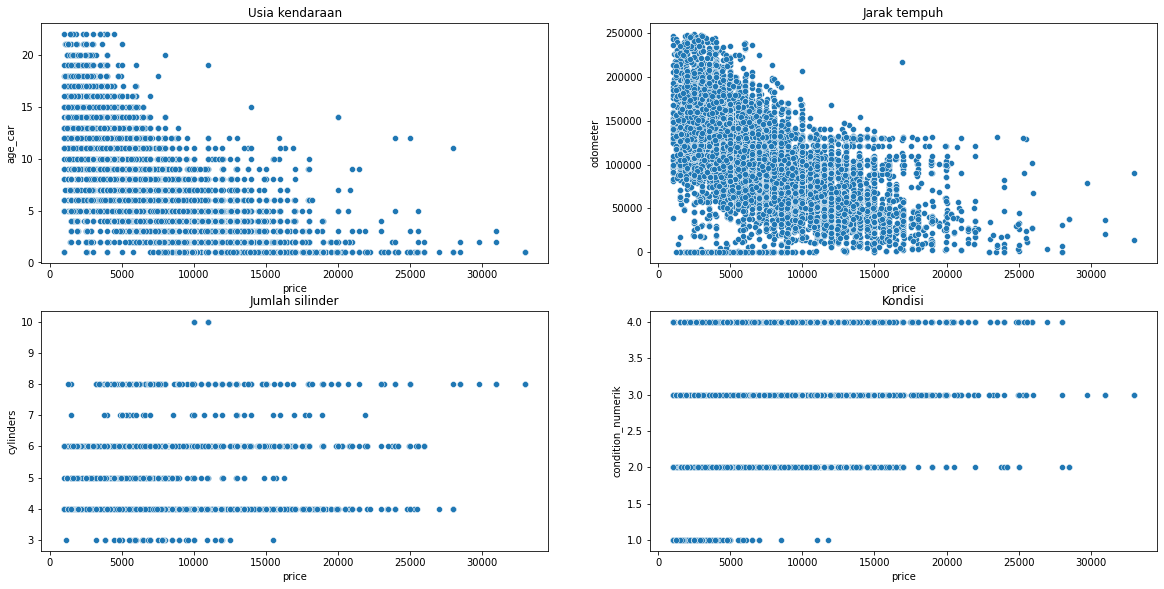

In [113]:
# Scatterplot untuk dataframe sedan 

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
plt.title('Usia kendaraan')
sns.scatterplot(data=sedan, x='price', y='age_car')

plt.subplot(3,2,2)
plt.title('Jarak tempuh')
sns.scatterplot(data=sedan, x='price', y='odometer')

plt.subplot(3,2,3)
plt.title('Jumlah silinder')
sns.scatterplot(data=sedan, x='price', y='cylinders')

plt.subplot(3,2,4)
plt.title('Kondisi')
sns.scatterplot(data=sedan, x='price', y='condition_numerik')

plt.show()

Kesimpulan Numerik untuk sedan

Berikut ini korelasi antara harga dengan parameter lain:
* Korelasi positif yang kuat mempengaruhi harga ada pada kolom model_year. Berarti semakin baru model sebuah kendaraan maka nilainya semakin mahal.
* Korelasi negatif yang kuat mempengaruhi harga ada pada kolom age_car. Berarti semakin tua usia kendaraan makan nilainya akan semakin murah.
* Parameter lainnya memiliki korelasi lemah baik positif atau negatif terhadap harga seperti yang ditunjukan data diatas.

**Kategorik**

Menganalisa kolom kategorik

In [114]:
# Kolom transmission
sedan['transmission'].value_counts()

automatic    10856
manual         540
other           72
Name: transmission, dtype: int64

Kendaraan yang diiklankan didominasi dengan sistem transmisi otomatis.

Text(0.5, 1.0, 'Korelasi antara harga dan transmisi')

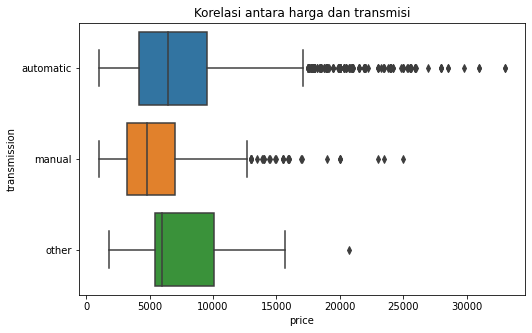

In [115]:
# Boxplot kolom transmission

plt.figure(figsize=(8, 5))
sns.boxplot(data=sedan, x='price', y='transmission')
plt.title('Korelasi antara harga dan transmisi')

In [116]:
# Kolom paint_color
sedan['paint_color'].value_counts()

unknown    2040
silver     1956
black      1696
grey       1574
white      1407
blue       1173
red         879
custom      257
brown       247
green       189
purple       22
yellow       19
orange        9
Name: paint_color, dtype: int64

In [117]:
# Daftar warna sedan yang valid (lebih dari 50 iklan)
sedan_colors_list = list(sedan['paint_color'].value_counts()[:-3].index)
sedan_colors_list

['unknown',
 'silver',
 'black',
 'grey',
 'white',
 'blue',
 'red',
 'custom',
 'brown',
 'green']

In [118]:
# Dataframe baru dengan filter warna diatas 50 iklan
sedan_colors = sedan[sedan['paint_color'].isin(sedan_colors_list)].reset_index(drop=True)

Text(0.5, 1.0, 'Korelasi antara harga dan warna')

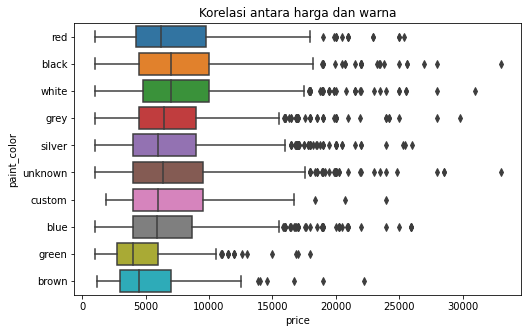

In [119]:
# Boxplot sedan dengan filter warna
plt.figure(figsize=(8, 5))
sns.boxplot(data=sedan_colors, x='price', y='paint_color')
plt.title('Korelasi antara harga dan warna')

Kesimpulan kategorik untuk sedan dari grafik boxplot
* Sedan dengan transmisi **otomatis** memiliki harga yang paling tinggi
* Sedan dengan warna **hitam** memiliki harga yang paling tinggi

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### SUV

**Numerik**

Menganalisa kolom numerik

In [120]:
# Membuat dataframe SUV
SUV = new_data[new_data['type']=='SUV'].reset_index(drop=True)

In [121]:
# Korelasi antara harga dan parameter lain
SUV.corr()['price']

price                1.000000
model_year           0.650368
cylinders            0.029437
odometer            -0.566148
is_4wd               0.128628
days_listed         -0.022871
day_posted           0.009699
month_posted        -0.006495
year_posted          0.001060
age_car             -0.645281
avg_distance_year    0.319248
condition_numerik    0.280870
Name: price, dtype: float64

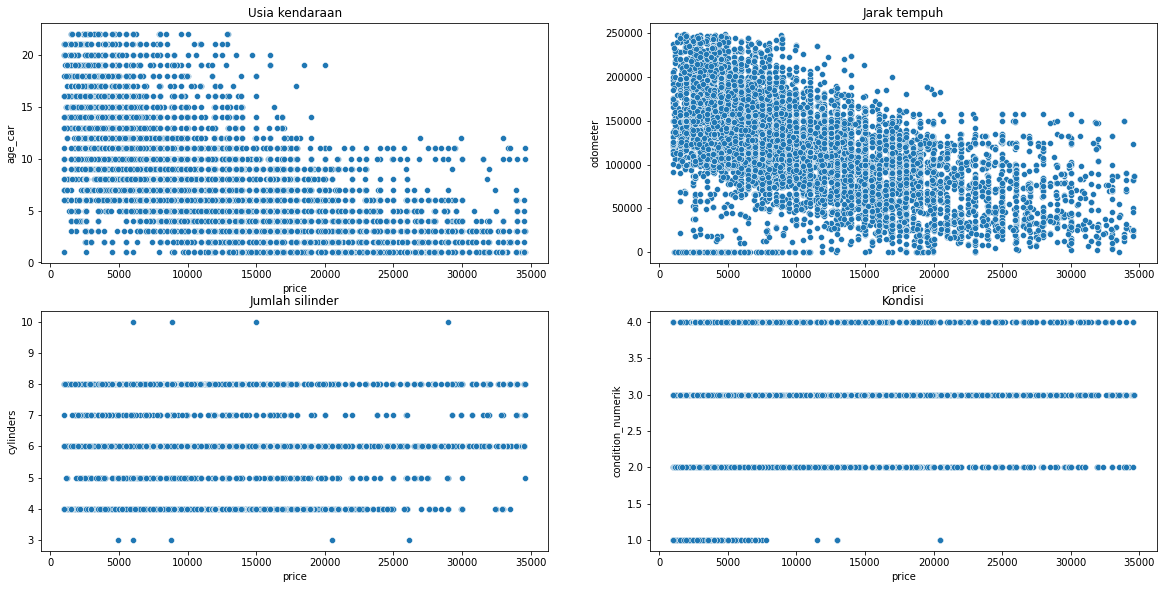

In [122]:
# Scatterplot untuk dataframe sedan 

plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
plt.title('Usia kendaraan')
sns.scatterplot(data=SUV, x='price', y='age_car')

plt.subplot(3,2,2)
plt.title('Jarak tempuh')
sns.scatterplot(data=SUV, x='price', y='odometer')

plt.subplot(3,2,3)
plt.title('Jumlah silinder')
sns.scatterplot(data=SUV, x='price', y='cylinders')

plt.subplot(3,2,4)
plt.title('Kondisi')
sns.scatterplot(data=SUV, x='price', y='condition_numerik')

plt.show()

Kesimpulan Numerik untuk SUV:

Serupa dengan sedan, SUV juga memiliki korelasi yang sama antara harga dan parameter lain. Korelasi positif yang kuat ada pada model_year dan korelasi negatif yang kuat ada pada age_car. Sedangkan parameter lain mememiliki korelasi yang lemah.

**Kategorik**

Menganalisa kolom kategorik

In [123]:
# Kolom transmission
SUV['transmission'].value_counts()

automatic    10865
manual         446
other           92
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Korelasi antara harga dan transmisi')

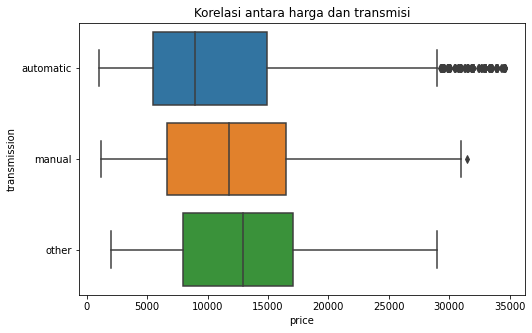

In [124]:
# Boxplot kolom transmission

plt.figure(figsize=(8, 5))
sns.boxplot(data=SUV, x='price', y='transmission')
plt.title('Korelasi antara harga dan transmisi')

In [125]:
# Kolom paint_color
SUV['paint_color'].value_counts()

unknown    2042
black      1989
white      1808
silver     1481
grey       1114
blue        971
red         837
green       387
brown       345
custom      268
orange       80
yellow       44
purple       37
Name: paint_color, dtype: int64

In [126]:
# Daftar warna SUV yang valid (lebih dari 50 iklan)
SUV_colors_list = list(SUV['paint_color'].value_counts()[:-2].index)
SUV_colors_list

['unknown',
 'black',
 'white',
 'silver',
 'grey',
 'blue',
 'red',
 'green',
 'brown',
 'custom',
 'orange']

In [127]:
# Dataframe baru dengan filter warna diatas 50 iklan
SUV_colors = SUV[SUV['paint_color'].isin(SUV_colors_list)].reset_index(drop=True)

Text(0.5, 1.0, 'Korelasi antara harga dan warna')

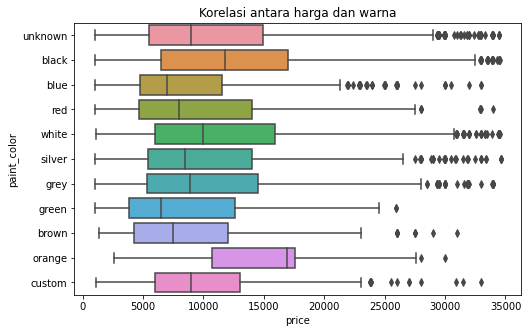

In [128]:
# Boxplot SUV dengan filter warna
plt.figure(figsize=(8, 5))
sns.boxplot(data=SUV_colors, x='price', y='paint_color')
plt.title('Korelasi antara harga dan warna')

Kesimpulan kategorik untuk sedan dari grafik boxplot
* SUV dengan transmisi **manual** memiliki harga yang paling tinggi
* SUV dengan warna **hitam** memiliki harga yang paling tinggi

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Kesimpulan Umum
1. Data awal memiliki 51525 dan 13 kolom
2. Ada 4 kolom yang memiliki nilai yang hilang yaitu 'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'. Nilai yang hilang diisi dengan group median atau group mean dari kolom lain yang terkait. Mean atau median dipilih berdasarkan ada tidaknya outlier.
3. Ada dua kolom yang memiliki nilai yang aneh yakni kolom 'price' dan 'odometer' nilai ini juga diisi dengan mean atau median.
4. Tipe data diperbaiki untuk kolom 'model_year', 'cylinders', 'odometer', 'date_posted', 'is_4wd'.
5. Untuk keperluan analisa beberapa kolom ditambahkan yakni: hari dalam minggu, usia kendaraan ketika iklan ditayangkan, jarak tempuh rata-rata per tahun, skala numerik untuk kondisi.
6. Outlier dibuang untuk mendapatkan hasil analisis yang lebih baik.
7. Setelah outlier dibuang didapat kesimpulan sebagai berikut:
* Harga akan semakin rendah jika usia kendaraan semakin tinggi
* Harga lebih tinggi untuk kendaraan yang memiliki silinder yang lebih banyak.
* Harga semakin tinggi untuk kendaraan keluaran tahun terbaru.
8. Terdapat perubahan signifikan pada dataframe untuk parameter harga, usia kendaraan, dan jarak tempuh setelah outlier dihilangkan. Namun perubahan data kurang terlihat pada parameter silinder dan kondisi kendaraan.
9. Kebanyakan kendaraan terjual pada 50 hari pertama sejak iklan ditayangkan.
10. Kendaraan populer adalah Sedan dan SUV dan memiliki harga relatif rendah dari jenis kendaraan lainnya.
11. Baik sedan maupun SUV yang berwarna hitam cenderung memiliki harga yang paling tinggi dibanding dengan warna lainnya.
12. Sistem transmisi otomatis lebih mahal untuk sedan namun sebaliknya untuk SUV.

Dengan demikian dapat disimpulkan bahwa kendaraan yang paling populer adalah sedan dan SUV. Sistem transmisi otomatis dijual lebih mahal untuk sedan dan sistem transmisi manual dijual lebih mahal untuk SUV. Warna hitam untuk kedua kendararaan ini dijual lebih mahal. Harga akan semakin murah pada kendaraan yang memiliki usia dan jarak tempuh yang tinggi.

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Juliman! Sudah mengerjakan ini dengan baik dan tanpa revisi. Keep going Juliman, you are doing very well!
    

</div>